In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

%matplotlib inline

In [61]:
with open("../umbra/data/umbra_contract_txs.json", "r") as file:
    contract_txs = json.load(file)["result"] #all the transactions' details related to the umbra contract

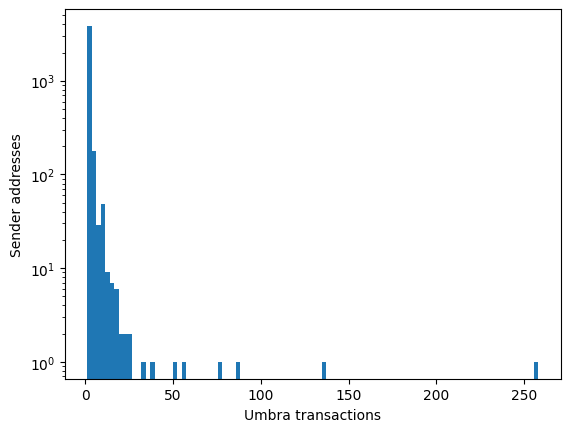

In [62]:
# How many times an address has communicated with umbra contract

txs_to_contract = []

for c in contract_txs:
    txs_to_contract.append(c["from"])

adresses_of_txs_to_contract_series = pd.Series(txs_to_contract, name="Txs count grouped by addressess")
adresses_of_txs_to_contract_count = adresses_of_txs_to_contract_series.value_counts()
df = pd.DataFrame({"Address": adresses_of_txs_to_contract_count.index, "Count": adresses_of_txs_to_contract_count.values})

plt.hist(adresses_of_txs_to_contract_count.values,bins=100)
plt.ylabel('Sender addresses')
plt.xlabel('Umbra transactions')
plt.yscale("log")
#print(mean(adresses_of_txs_to_contract_count.values))

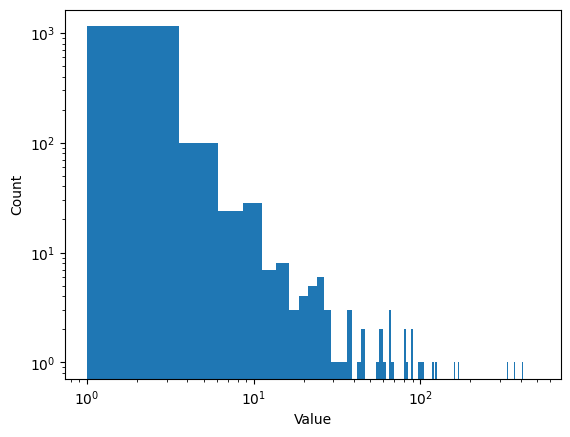

In [6]:
#Sent eth

amounts = []

for d in contract_txs:
    if d["functionName"] == "sendEth(address _receiver, uint256 _tollCommitment, bytes32 _pkx, bytes32 _ciphertext)":
        amounts.append(int(d["value"])/pow(10, 18))

amounts = pd.Series(amounts, name="Wei amounts")
amounts_count = amounts.value_counts()
df = pd.DataFrame({"Sent eth": amounts_count.index, "Sender Addresses": amounts_count.values})

plt.hist(amounts_count.values,bins=200)
plt.ylabel('Count')
plt.xlabel('Value')
plt.yscale("log")
plt.xscale("log")

In [3]:
sys.path.append('../')
import sys
from helper import Access
from helper import FunctionName as fn
import json

_access = Access()

with open("../umbra/data/umbra_contract_txs.json", "r") as file:
    contract_txs = json.load(file)["result"]

with open("../umbra/data/stealth_key_registry_contract_txs.json", "r") as file:
    stealth_contract_txs = json.load(file)["result"]

ens_database = "../umbra/data/ens_database.json"

with open(ens_database, "r") as file:
    ens_db = json.load(file)

    addresses  txs
0        3626    1
1         827    2
2         204    3
3          75    4
4          46    5
5          15    6
6          11    7
7          10    8
8           4   12
9           4   10
10          3    9
11          3   11
12          1   13
13          1   18
14          1   14
15          1   24
16          1   23
17          1   35
18          1   38
[3626  827  204   75   46   15   11   10    4    4    3    3    1    1
    1    1    1    1    1]


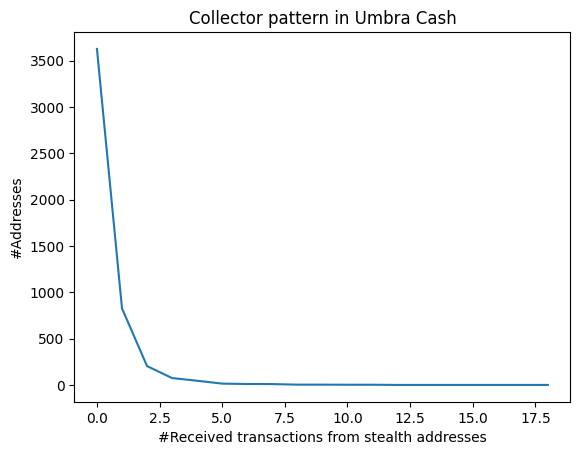

In [42]:
# The number of txs when the funds were sent directly to the same address

with open("results/collector_pattern.json", "r") as file:
    collection_counts = json.load(file)

amounts = list(map(lambda d: d["collection_count"], collection_counts.values()))

amounts = pd.Series(amounts, name="Collector Pattern: Counts")
amounts_count = amounts.value_counts()
df = pd.DataFrame({"addresses": amounts_count.values, "txs": amounts_count.index})

print(df)
print(amounts_count.values)
plt.plot(amounts_count.values)
plt.ylabel('#Addresses')
plt.xlabel('#Received transactions from stealth addresses')
plt.title('Collector pattern in Umbra Cash')
plt.savefig('results/Figures/CollectorPattern.pdf')
plt.show()

In [23]:
# Check if there is an address who received both eth and token

from collections import Counter

with open("../umbra/data/umbra_contract_txs.json", "r") as file:
    data = json.load(file)

contract_txs = data["result"]

token = []
eth = []

for d in contract_txs:
    if d["functionName"] == fn.S_ETH.value:
        receiver = d[d["functionName"]]["_receiver"]

        for tx in d[d["functionName"]][receiver]:
            eth.append(tx["to"])

    if d["functionName"] == fn.W_TOKEN.value:
        acceptor = d[d["functionName"]]["_acceptor"]
        token.append(acceptor)


for t in token:
    if t in eth:
        print(t)

# Since there's nothing to print, no one has used umbra to withdraw both eth and token

token = Counter(token)
eth = Counter(eth)

print(max(dict(token).values()))
print(max(dict(eth).values()))

# But there are people who have used an address to withdraw more than once exclusively for eth or token

11
38
